## Basics

In [1]:
from primitives import Parameters
p = Parameters()
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#print("Before first call:", cc.__dict__)
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
#print("After first call:", cc.__dict__)

In [12]:
(cc_J,cc_W,cc_Wstar)=cc.J()

In [3]:
#(ccinv_J,ccinv_W,ccinv_Wstar)=cc.J() #wtf??? this takes SO MUCH MORE TIME!!!

In [9]:
from ContinuousContract_inv import ContinuousContract_inv
cc_inv=ContinuousContract_inv(p) #this is continuous contract with FOC that writes the expectation as a function of today's value

In [10]:
(ccinv_J,ccinv_W,ccinv_Wstar)=cc_inv.J()

# Plots

In [13]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

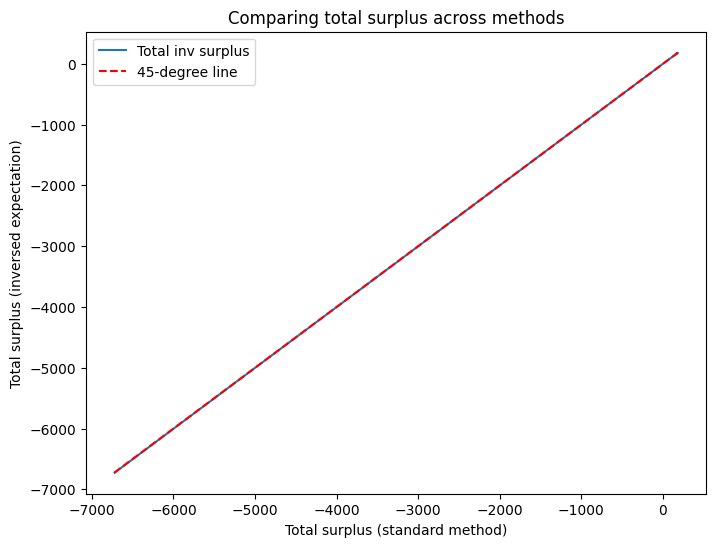

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))#This creates a figure and a set of subplots with a specific size. The size is specified in inches (width, height).

# Plot the original data
ax.plot(cc_W[p.z_0-1,:]+cc_J[p.z_0-1,:], ccinv_W[p.z_0-1,:]+ccinv_J[p.z_0-1,:], label='Total inv surplus')

# Calculate the range for the 45-degree line
x_vals = cc_W[p.z_0-1,:] + cc_J[p.z_0-1,:]
y_vals = ccinv_W[p.z_0-1,:] + ccinv_J[p.z_0-1,:]
min_val = min(min(x_vals), min(y_vals))
max_val = max(max(x_vals), max(y_vals))

# Add the 45-degree line
ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='45-degree line')

# Add titles and labels
ax.set_title('Comparing total surplus across methods')
ax.set_xlabel('Total surplus (standard method)')
ax.set_ylabel('Total surplus (inversed expectation)')
ax.legend()

# Save the plot to a file
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Total surplus comparison.png'), bbox_inches='tight')  # Save as PNG
#    plt.savefig(os.path.join(output_dir,'Total surplus comparison.pdf'), bbox_inches='tight')  # Save as PDF

# Show the plot
plt.show()

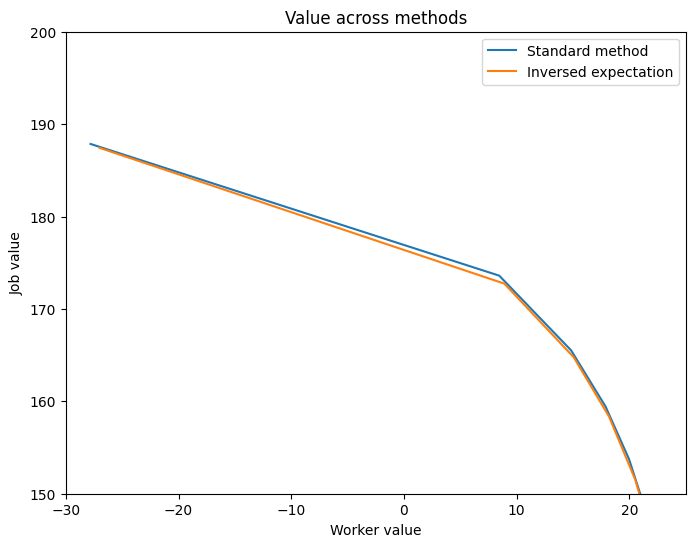

In [16]:
# Create a figure with a specific size
plt.figure(figsize=(8, 6))  # Width=16 inches, Height=12 inches

# Plot the data
plt.plot(cc_W[p.z_0-1, :], cc_J[p.z_0-1, :], label='Standard method')
plt.plot(ccinv_W[p.z_0-1,:], ccinv_J[p.z_0-1, :], label='Inversed expectation')

# Add titles and labels
plt.title('Value across methods')
plt.xlabel('Worker value')
plt.ylabel('Job value')

# Optionally set x and y limits
# plt.xlim([-30, 30])
# plt.ylim([150, 200])

# Add legend
plt.legend()

# Save the plot to a file in the specified directory
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Value across methods.png'), bbox_inches='tight')  # Save as PNG


# Optionally set x and y limits
plt.xlim([-30, 25])
plt.ylim([150, 200])
# Save the plot to a file
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Value across methods zoom.png'), bbox_inches='tight')  # Save as PNG

# Show the plot (optional)
plt.show()

In [20]:
min(cc_W[p.z_0-1,:] + cc_J[p.z_0-1,:])

-3126.1027104571353

In [23]:
ccinv_J[p.z_0-1,:]

array([ 2.38134307e+02,  2.23019194e+02,  2.14711860e+02,  2.07888340e+02,
        2.02054807e+02,  1.94378882e+02,  1.74991214e+02,  1.56343789e+02,
        1.45803260e+02,  1.43716071e+02,  1.41810144e+02,  1.40960458e+02,
        1.40452682e+02,  1.39944906e+02,  1.39437130e+02,  1.38929353e+02,
        1.38421577e+02,  1.37913801e+02,  1.37406024e+02,  1.36898248e+02,
        1.36390472e+02,  1.35882695e+02,  1.35374919e+02,  1.34867143e+02,
        1.34359366e+02,  1.33851590e+02,  1.33343814e+02,  1.32836037e+02,
        1.32328261e+02,  1.31820485e+02,  1.31312708e+02,  1.30804932e+02,
        1.30297156e+02,  1.29789379e+02,  1.29281603e+02,  1.28773827e+02,
        1.28266050e+02,  1.27758274e+02,  1.26624284e+02,  1.23403224e+02,
        1.20166059e+02,  1.16911992e+02,  1.13640241e+02,  1.10350034e+02,
        1.07040611e+02,  1.03711218e+02,  1.00361110e+02,  9.69895441e+01,
        9.35957808e+01,  9.01790830e+01,  8.67387138e+01,  8.32739353e+01,
        7.97840078e+01,  

Text(0.5, 1.0, 'J')

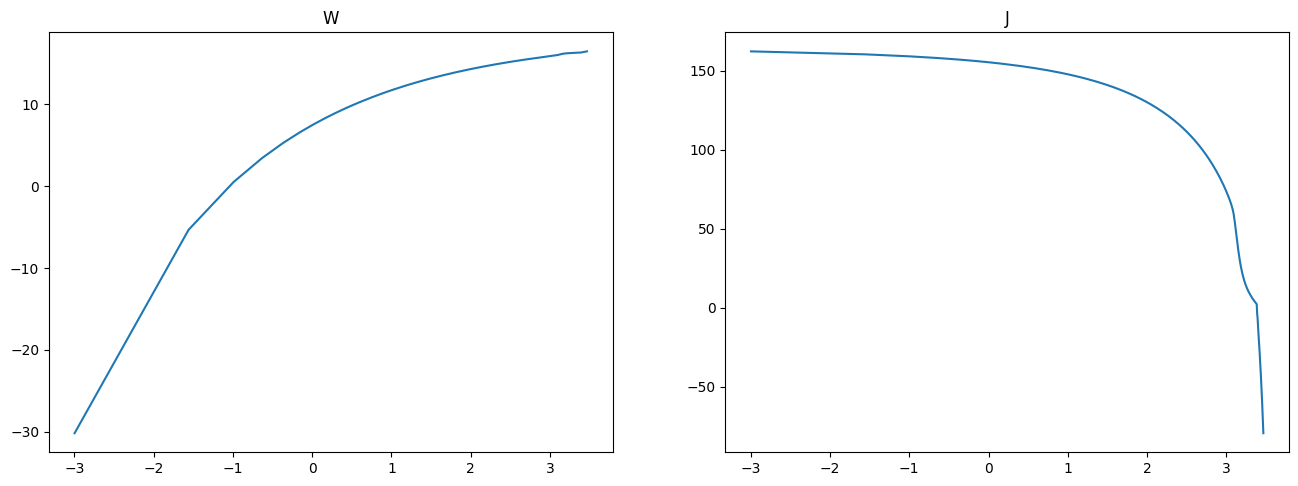

In [58]:
nrows = 2
ncols = 2

plt.figure(figsize=(16, 12))
plt.subplot(nrows, ncols, 1)
plt.plot(np.log(cc.w_grid), cc_W[0, :])
plt.title('W')

plt.subplot(nrows, ncols, 2)
plt.plot(np.log(cc.w_grid), cc_J[0, :])
plt.title('J')

In [27]:
ccinv_J[1,30]+ccinv_W[1,30]

127.55846295127625

In [28]:
cc_J[1,30]+cc_W[1,30]

127.72096063611835

In [45]:
ccinv_J+ccinv_W-cc_J-cc_W

array([[-1.03015740e+00, -1.04152838e+00, -1.02359843e+00,
        -1.00451329e+00, -9.86038839e-01, -9.68363710e-01,
        -9.51432730e-01, -9.35152973e-01, -9.19435917e-01,
        -9.04205533e-01, -8.89398265e-01, -8.74961216e-01,
        -8.60850190e-01, -8.47028011e-01, -8.33463163e-01,
        -8.20128720e-01, -8.07001505e-01, -7.94061427e-01,
        -7.81290959e-01, -7.68674717e-01, -7.56199129e-01,
        -7.43852162e-01, -7.31623097e-01, -7.19502352e-01,
        -7.07481330e-01, -6.95552292e-01, -6.83708252e-01,
        -6.71942891e-01, -6.60250480e-01, -6.48625819e-01,
        -6.37064178e-01, -6.25561254e-01, -6.14113134e-01,
        -6.02716251e-01, -5.91367364e-01, -5.80063528e-01,
        -5.68802072e-01, -5.57580577e-01, -5.46396866e-01,
        -5.35248984e-01, -5.24135186e-01, -5.13053930e-01,
        -5.02003863e-01, -4.90983819e-01, -4.79992807e-01,
        -4.69030009e-01, -4.58094775e-01, -4.47186621e-01,
        -4.36305224e-01, -4.25450424e-01, -4.14622222e-0

In [36]:
ccinv_W-cc_W

array([[ 0.12225023,  0.06161856,  0.04741097,  0.0402791 ,  0.0358051 ,
         0.03266591,  0.03030834,  0.02845481,  0.02694868,  0.02569401,
         0.02462827,  0.02370879,  0.02290527,  0.02219554,  0.02156297,
         0.02099479,  0.02048103,  0.02001373,  0.01958653,  0.01919419,
         0.01883241,  0.01849761,  0.01818677,  0.01789732,  0.01762709,
         0.01737421,  0.01713703,  0.01691416,  0.01670435,  0.01650653,
         0.01631973,  0.01614312,  0.01597592,  0.01581748,  0.0156672 ,
         0.01552452,  0.01538897,  0.0152601 ,  0.01513753,  0.01502089,
         0.01490985,  0.01480412,  0.01470342,  0.01460752,  0.01451618,
         0.01442921,  0.0143464 ,  0.0142676 ,  0.01419264,  0.01412137,
         0.01405367,  0.01398941,  0.01392849,  0.0138708 ,  0.01381625,
         0.01376475,  0.01371624,  0.01367063,  0.01362788,  0.01358791,
         0.0135507 ,  0.01351618,  0.01348432,  0.01345509,  0.01342847,
         0.01340442,  0.01338293,  0.01336398,  0.0

In [33]:
ccinv_W[0,90]
ccinv_J[0,90]

101.54990346633997

In [34]:
cc_W[0,91]
cc_J[0,91]

100.8808807777475

In [37]:
ccinv_J-cc_J #larger difference, even worse at low values, even better at high values #always higher promised value though!

array([[-1.15240763e+00, -1.10314694e+00, -1.07100940e+00,
        -1.04479239e+00, -1.02184394e+00, -1.00102962e+00,
        -9.81741072e-01, -9.63607779e-01, -9.46384598e-01,
        -9.29899539e-01, -9.14026539e-01, -8.98670006e-01,
        -8.83755455e-01, -8.69223549e-01, -8.55026134e-01,
        -8.41123514e-01, -8.27482531e-01, -8.14075162e-01,
        -8.00877487e-01, -7.87868906e-01, -7.75031542e-01,
        -7.62349772e-01, -7.49809863e-01, -7.37399675e-01,
        -7.25108425e-01, -7.12926497e-01, -7.00845282e-01,
        -6.88857048e-01, -6.76954833e-01, -6.65132349e-01,
        -6.53383911e-01, -6.41704371e-01, -6.30089057e-01,
        -6.18533735e-01, -6.07034561e-01, -5.95588048e-01,
        -5.84191039e-01, -5.72840680e-01, -5.61534395e-01,
        -5.50269869e-01, -5.39045033e-01, -5.27858046e-01,
        -5.16707287e-01, -5.05591340e-01, -4.94508992e-01,
        -4.83459217e-01, -4.72441179e-01, -4.61454220e-01,
        -4.50497860e-01, -4.39571795e-01, -4.28675892e-0

#Previous version, without beta

In [72]:
ccinv_W-cc_W

array([[ 2.90364560e-02,  1.75190072e-02,  1.48187451e-02,
         1.34630108e-02,  1.26123269e-02,  1.20152587e-02,
         1.15666806e-02,  1.12138444e-02,  1.09269892e-02,
         1.06878817e-02,  1.04846457e-02,  1.03091692e-02,
         1.01556980e-02,  1.00200216e-02,  9.89897876e-03,
         9.79014368e-03,  9.69161966e-03,  9.60189954e-03,
         9.51976848e-03,  9.44423498e-03,  9.37448075e-03,
         9.30982367e-03,  9.24969001e-03,  9.19359330e-03,
         9.14111798e-03,  9.09190667e-03,  9.04565017e-03,
         9.00207939e-03,  8.96095897e-03,  8.92208203e-03,
         8.88526593e-03,  8.85034874e-03,  8.81718638e-03,
         8.78565017e-03,  8.75562477e-03,  8.72700652e-03,
         8.69970200e-03,  8.67362672e-03,  8.64870414e-03,
         8.62486473e-03,  8.60204519e-03,  8.58018778e-03,
         8.55923973e-03,  8.53915272e-03,  8.51988244e-03,
         8.50138818e-03,  8.48363253e-03,  8.46658101e-03,
         8.45020183e-03,  8.43446569e-03,  8.41934548e-0

In [69]:
ccinv_J[0,:]

array([161.52532182, 159.6886926 , 158.42899841, 157.36834879,
       156.41729502, 155.53757404, 154.70866534, 153.91806894,
       153.1575114 , 152.42118504, 151.70482975, 151.00521173,
       150.31980789, 149.6466048 , 148.9839651 , 148.33053569,
       147.68518281, 147.04694493, 146.41499781, 145.78862824,
       145.16721374, 144.55020684, 143.93712271, 143.32752915,
       142.72103868, 142.11730192, 141.51600234, 140.91685173,
       140.31958651, 139.72396464, 139.12976296, 138.53677492,
       137.9448087 , 137.35368552, 136.76323821, 136.17330998,
       135.58375333, 134.99442908, 134.40520555, 133.81595782,
       133.22656706, 132.63691996, 132.0469082 , 131.45642799,
       130.86537963, 130.27366717, 129.68119804, 129.08788275,
       128.4936346 , 127.89836944, 127.30200543, 126.7044628 ,
       126.10566369, 125.50553195, 124.90399297, 124.30097352,
       123.69640163, 123.09020641, 122.48231797, 121.87266725,
       121.26118596, 120.64780643, 120.03246155, 119.41

In [68]:
ccinv_J[0,:]-cc_J[0,:]

array([-8.17560917e-01, -7.78108824e-01, -7.52375611e-01, -7.31386281e-01,
       -7.13015772e-01, -6.96354849e-01, -6.80915810e-01, -6.66401551e-01,
       -6.52615428e-01, -6.39419419e-01, -6.26712307e-01, -6.14417286e-01,
       -6.02474466e-01, -5.90836084e-01, -5.79463333e-01, -5.68324179e-01,
       -5.57391815e-01, -5.46643541e-01, -5.36059932e-01, -5.25624215e-01,
       -5.15321785e-01, -5.05139831e-01, -4.95067041e-01, -4.85093365e-01,
       -4.75209828e-01, -4.65408368e-01, -4.55681718e-01, -4.46023291e-01,
       -4.36427098e-01, -4.26887671e-01, -4.17400004e-01, -4.07959492e-01,
       -3.98561896e-01, -3.89203294e-01, -3.79880054e-01, -3.70588802e-01,
       -3.61326395e-01, -3.52089901e-01, -3.42876580e-01, -3.33683863e-01,
       -3.24509341e-01, -3.15350748e-01, -3.06205953e-01, -2.97072945e-01,
       -2.87949828e-01, -2.78834807e-01, -2.69726186e-01, -2.60622359e-01,
       -2.51521802e-01, -2.42423071e-01, -2.33324794e-01, -2.24225670e-01,
       -2.15124461e-01, -

In [3]:
from BasicContract_r import BasicContract_r

bc=BasicContract_r(5,cc.js,p)

(bcr_J,bcr_W)=bc.J_K()

In [57]:
bcr_W[0,24,:]
#bcr_J[0,24,:]

array([15.27295433, 15.83083595, 16.23173365, 16.3040549 , 16.3040549 ])

In [56]:
cc_W[0,90]
#cc_J[0,90]
#cc_Wstar[0,90]

15.446763609841662

In [32]:
bcr_W[0,10,:]
bcr_J[0,10,:]

array([80.37330498, 61.34829157, 37.74631678, 27.14466755, 26.48969014])

In [31]:
cc_W[0,41]
cc_J[0,41]

132.95227071155387

In [40]:
cc_W[0,99]
cc_J[0,99]

22.21927746547145

In [6]:
cc_Wstar[0,47]

70.45571150552406

In [30]:
bcr_W[0,48,0]
bcr_J[0,48,0]

28.19511365412852

In [46]:
cc_W[0,3]
#cc_J[0,3]
#cc_Wstar[0,3]

39.5094092600252

In [14]:
bcr_J[0,50,:]

array([34.23056457, 26.48969019, 26.48969019, 26.48969019, 26.48969019])

In [11]:
bcr_W[0,40,:]
#bcr_J[0,3,:]

array([15.8296092 , 16.23373836, 16.3040549 , 16.3040549 , 16.3040549 ])

In [ ]:
from BasicContract import BasicContract

bc=BasicContract(3,cc.js,p)

(best_r,bc_J)=bc.J_K()

In [ ]:
cc.js.re(150)

In [ ]:
import numpy as np
best_r*bc.v_grid_0[:,np.newaxis]

In [ ]:
best_r

In [ ]:
bc.v_grid_0

## Comparisons across contracts

In [ ]:
cc_W[0,0]#=60.185
cc_J[0,0]

In [ ]:
bc_J[0]

In [ ]:
bc_J[1].shape[1]

In [ ]:
cc_W[0,4]#=69.78
cc_J[0,4]

In [ ]:
bc_J[1]

In [ ]:
cc_W[0,15]#=79.79
cc_J[0,15]

In [ ]:
bc_J[2]

In [ ]:
cc_W[0,45]#=90.01
cc_J[0,45]

In [ ]:
bc_J[3]

In [ ]:
cc_W[0,99]
cc_J[0,99]

In [ ]:
bc_J[4]

In [ ]:
15.25811404/16.986493446281656

In [ ]:
cc_W[0,197]#=110
cc_J[0,197]